In [1]:
import dill
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization
from datetime import datetime as dt

delays = {}

exec(open('utils.py').read())
print('Loaded')

MAX_YEAR = CURRENT_YEAR + 100 # CURRENT_YEAR defined in utils.py
years = list(range(CURRENT_YEAR, MAX_YEAR))

Loaded


## Algorithms/insights delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.03013  | 2.394     | 9.275     | 0.708     |
| 10        | -0.01407  | 0.2365    | 9.339     | 0.9636    |
| 42        | -0.01404  | 0.3702    | 9.39      | 1.549     |
| 48        | -0.01159  | 0.5495    | 9.764     | 0.8618    |


<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power


Curve params found
{'push': 0.5494816798404242,
 'shift': 9.764067439606197,
 'slope': 0.8617682232344624}
-
## Chance of nonscaling delay ##


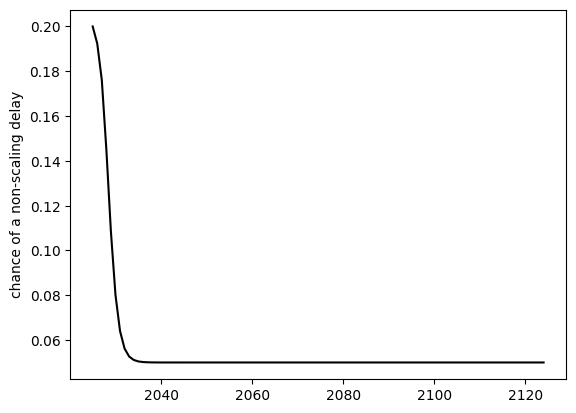

Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 19%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 15%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 11%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 8%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2034 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2035 - ch

In [2]:
nonscaling_points = [(2024, 0.2),
                     (2027, 0.15),
                     (2030, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['algorithms'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(2, 5)], [0.1, sq.lognorm(2, 20)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['algorithms']['length'] @ 1000, digits=0))

## Infrastructure delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.1378   | 2.492     | 3.099     | 5.543     |
| 6         | -0.1247   | 0.9927    | 2.821     | 7.357     |
| 12        | -0.04871  | 0.695     | 7.993     | 2.133     |
| 42        | -0.04743  | 0.3353    | 7.642     | 3.755     |
| 43        | -0.03779  | 0.7248    | 6.627     | 2.547     |
| 49        | -0.03584  | 0.6408    | 5.12      | 2.404     |


<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power


| 100       | -0.03166  | 0.01      | 10.0      | 7.369     |


<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power


Curve params found
{'push': 0.01, 'shift': 10.0, 'slope': 7.368733652125011}
-
## Chance of nonscaling delay ##


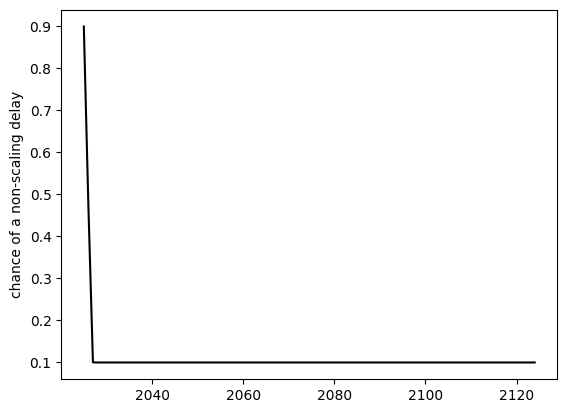

Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 47%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2034 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2035

In [3]:
# https://twitter.com/ohlennart/status/1645058017119854592
# https://asteriskmag.com/issues/03/the-transistor-cliff
nonscaling_points = [(2024, 0.9),
                     (2026, 0.5),
                     (2030, 0.2),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['infra'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(1, 5)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['infra']['length'] @ 1000, digits=0))

## Data delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.1764   | 6.502     | 4.76      | 9.739     |
| 3         | -0.1503   | 1.765     | 4.576     | 9.49      |
| 10        | -0.15     | 0.4849    | 6.305     | 6.455     |
| 14        | -0.1344   | 2.204     | 4.397     | 0.4949    |
| 23        | -0.1194   | 0.7702    | 8.96      | 1.91      |
| 43        | -0.09274  | 1.24      | 9.854     | 1.164     |
| 50        | -0.03808  | 0.7104    | 9.241     | 1.007     |
| 51        | -0.02694  | 0.5597    | 8.739     | 0.7258    |
| 52        | -0.02203  | 0.3878    | 8.602     | 1.166     |


<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power


Curve params found
{'push': 0.3877506169330576,
 'shift': 8.601892161398506,
 'slope': 1.1661352608304691}
-
## Chance of nonscaling delay ##


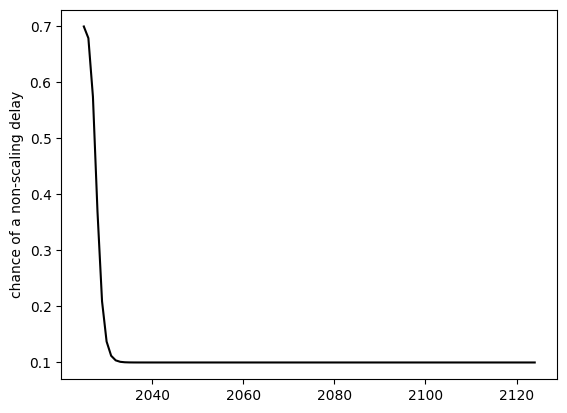

Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 68%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 57%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 37%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 21%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 14%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 11%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2034 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2035

In [4]:
nonscaling_points = [(2024, 0.7),
                     (2027, 0.6),
                     (2030, 0.2),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['data'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 8)], [0.1, sq.lognorm(3, 10)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['data']['length'] @ 1000, digits=0))

## Robotics need delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 16        | -0.05     | 0.5311    | 2.355     | 9.062     |


<string>:64: RuntimeWarning: overflow encountered in scalar power


| 41        | -0.05     | 0.01      | 10.0      | 10.0      |


<string>:64: RuntimeWarning: overflow encountered in scalar power


| 42        | -0.05     | 0.01      | 10.0      | 6.082     |
| 44        | -0.04828  | 0.01      | 10.0      | 2.098     |


<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power


| 48        | -0.0461   | 0.01      | 7.312     | 1.867     |


<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power


Curve params found
{'push': 0.01, 'shift': 7.311914882455869, 'slope': 1.8672431860989875}
-
## Chance of nonscaling delay ##


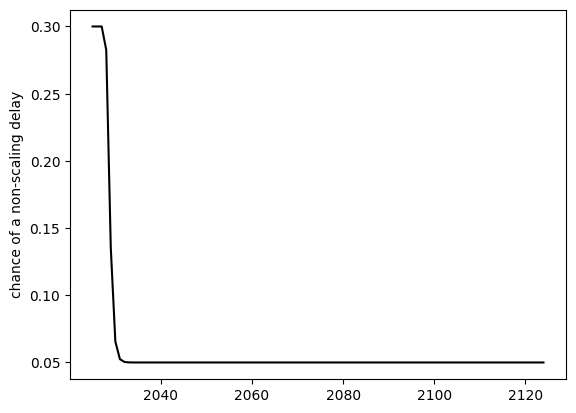

Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 28%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 14%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 7%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2034 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2035 - ch

In [5]:
nonscaling_points = [(2024, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['robotics'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.85, sq.lognorm(1, 5)],
                                                                        [0.15, sq.lognorm(1, 15)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['robotics']['length'] @ 1000, digits=0))

## Integration delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.06717  | 4.227     | 4.208     | 5.446     |
| 14        | -0.06655  | 6.799     | 8.498     | 9.182     |
| 16        | -0.05688  | 2.457     | 9.021     | 4.048     |
| 18        | -0.04449  | 0.5926    | 8.698     | 1.067     |


<string>:64: RuntimeWarning: overflow encountered in scalar power


| 84        | -0.04063  | 0.02205   | 3.516     | 1.45      |
| 93        | -0.03224  | 0.8113    | 7.378     | 0.3319    |


<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power


Curve params found
{'push': 0.8112556394895333,
 'shift': 7.378217486948094,
 'slope': 0.33185769061814724}
-
## Chance of nonscaling delay ##


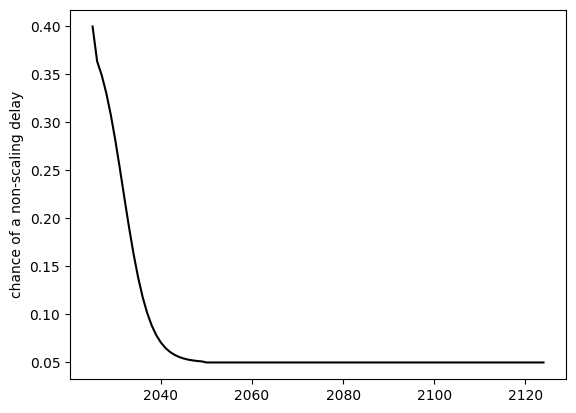

Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 36%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 35%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 33%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 31%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 28%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 25%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 22%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 19%
Year: 2034 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 16%
Year: 2035

In [6]:
# https://twitter.com/MatthewJBar/status/1653461856919654400
nonscaling_points = [(2024, 0.4),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['integration'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(3, 30)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['integration']['length'] @ 1000, digits=0))

##  Real world feedback delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.01969  | 8.452     | 6.349     | 6.712     |
| 3         | -0.01546  | 5.305     | 0.2645    | 9.743     |
| 8         | -0.01041  | 1.492     | 8.664     | 4.071     |
| 14        | -0.001085 | 0.01224   | 8.829     | 1.496     |


<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power


Curve params found
{'push': 0.012235967774430059,
 'shift': 8.829035942994063,
 'slope': 1.495609454820776}
-
## Chance of nonscaling delay ##


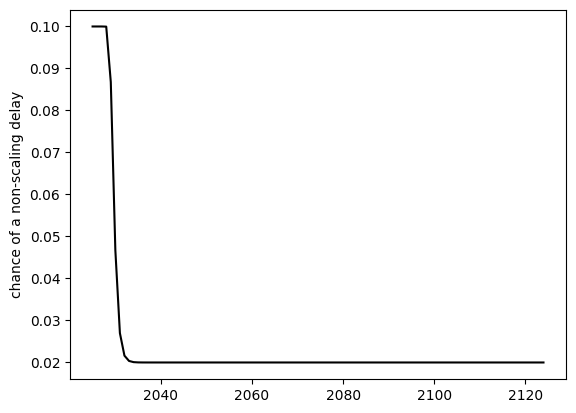

Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 9%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 3%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2034 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2035 - cha

In [7]:
nonscaling_points = [(2024, 0.1),
                     (2030, 0.05),
                     (2050, 0.02)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['real_world_feedback'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.8, sq.lognorm(3, 10)],
                                                                                   [0.1, sq.lognorm(10, 30)],
                                                                                   [0.1, sq.lognorm(20, 50)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['real_world_feedback']['length'] @ 1000, digits=0))

## Take off speeds

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.1148   | 0.3336    | 0.6971    | 1.313     |
| 5         | -0.1143   | 2.111     | 1.787     | 8.391     |
| 9         | -0.1137   | 1.397     | 3.562     | 5.24      |
| 17        | -0.1135   | 1.535     | 2.12      | 6.635     |
| 18        | -0.1126   | 1.305     | 2.149     | 8.629     |
| 21        | -0.09444  | 0.2153    | 7.71      | 1.084     |


<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power


| 103       | -0.08694  | 0.01      | 1.978     | 0.7141    |
| 104       | -0.06046  | 0.434     | 1.747     | 0.07719   |
| 106       | -0.04215  | 0.594     | 2.688     | 0.1007    |
Curve params found
{'push': 0.5940045174602773,
 'shift': 2.687547862421068,
 'slope': 0.10067257838946696}
-
## Chance of nonscaling delay ##


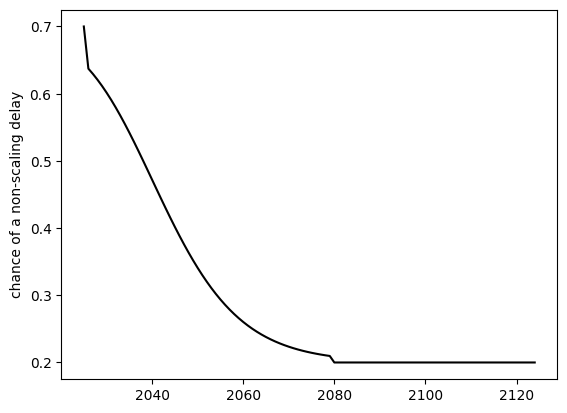

Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 64%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 63%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 62%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 61%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 59%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 58%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 57%
Year: 2034 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 55%
Year: 2035

In [8]:
# https://www.lesswrong.com/posts/Gc9FGtdXhK9sCSEYu/what-a-compute-centric-framework-says-about-ai-takeoff
nonscaling_points = [(2024, 0.7),
                     (2030, 0.5),
                     (2050, 0.35),
                     (2080, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['take_off'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(2, 15)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['take_off']['length'] @ 1000, digits=0))

## Save

In [9]:
with open('caches/nonscaling_delays.dill', 'wb') as f:
    dill.dump(delays, f)
    
print('cached!')

cached!


In [10]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2024-04-11 13:54:10.761975
